# Applying the best model on test data

In [34]:
#Installing the necessary libraries
!pip install pandas
!pip install openpyxl
!pip install sklearn
!pip install matplotlib
!pip install scikit-optimize
!pip install numpy
!pip install shap
!pip install catboost
!pip install xgboost
!pip install shap

In [35]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.svm import SVR
from skopt import BayesSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Real, Categorical 
from sklearn import utils
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBRegressor
import seaborn as sns
import shap

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
import shap
plt.style.use('seaborn')

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import re
import pubchempy as pcp
from sklearn import svm
from sklearn.svm import SVR
from skopt import BayesSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Real, Categorical 
from sklearn import utils
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBRegressor

import shap

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors3D
from rdkit.Chem import rdchem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdchem import PeriodicTable, GetPeriodicTable
from rdkit.Chem import Fragments
from rdkit.Chem.rdchem import EditableMol
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from rdkit.Chem import PyMol
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec

### Working with the table
First you need to edit the table a little and see its main characteristics for further machine learning

In [37]:
#We move the predicted column to the end for convenience
db_final1 = pd.read_excel('density_df_ML.xlsx')
db_final = db_final1.drop(columns=['Density, g/cm^3'])
db_final.insert(0, 'Density, g/cm^3', db_final1['Density, g/cm^3'])
db_final = db_final.drop(['Unnamed: 0', 'isomer_smiles#1', 'isomer_smiles#2', 'isomer_smiles#3'], axis = 1)

In [38]:
colors = ['#a5678e','#e8b7d4', '#beb7d9', '#7eabd4', '#31539d'] # Palette of colors

In [40]:
#Summary table description
db_final.describe()

,"Density, g/cm^3",X#1 (molar fraction),X#2 (molar fraction),X#3 (molar fraction),I,II,III,IV,V,"Temperature, K",...,Al,P,S,Cl,K,Fe,Cu,Zn,Br,ind_syst
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.00000,4023.000000,4023.000000,4023.000000,...,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,1.102685,0.339358,0.631537,0.028610,0.014666,0.000497,0.64355,0.076808,0.348993,320.802819,...,0.016504,0.016653,0.016844,0.238318,0.002624,0.001938,0.000166,0.001118,0.030770,167.465076
std,0.168574,0.195431,0.202706,0.122092,0.120226,0.022294,0.47901,0.266320,0.476711,20.840671,...,0.095252,0.074733,0.094404,0.363968,0.020760,0.028757,0.010516,0.021395,0.097856,115.642087
min,0.806000,0.034000,0.078000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,278.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.996560,0.200000,0.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,303.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000
50%,1.087000,0.333000,0.667000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,318.150000,...,0.000000,0.000000,0.000000,0.143000,0.000000,0.000000,0.000000,0.000000,0.000000,132.000000
75%,1.185493,0.500000,0.800000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,333.150000,...,0.000000,0.000000,0.000000,0.333000,0.000000,0.000000,0.000000,0.000000,0.000000,269.000000
max,1.988000,0.917000,0.950000,0.843000,1.000000,1.000000,1.00000,1.000000,1.000000,413.150000,...,0.667000,0.667000,0.667000,3.001000,0.400000,0.667000,0.667000,0.667000,0.999000,403.000000


### Splitting data into test and train

In [41]:
# A function for splitting data so that different systems appear in the test and train sample
def custom_cv(x,y,groups,n_splits,test_size):
    custom_cv = []
    kfold = GroupShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42) #randomized test/train indexes to split data according to a third-party group provided
    for train_idx, test_idx in kfold.split(x, y, groups): 
        custom_cv.append((train_idx, test_idx)) #Returning data as a tuple
    return custom_cv

In [42]:
# We split the sample so that there are different systems in the test and training
y = db_final.loc[:,'Density, g/cm^3']
x = db_final.loc[:,'X#1 (molar fraction)':]
cv = custom_cv(x, y, db_final['ind_syst'], 1, 0.2) #Separation using the function
for train_idx, val_idx in cv:
    x_train, x_test = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]

### Functions for plotting and calculating metrics

In [43]:
#Let's introduce a function for plotting graphs
def regr_plot(y_train, y_test, y_pred, y1_pred):
    f, ax = plt.subplots(figsize=(15, 10)) #Initialization - creating an empty graph
    plt.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train') #Prediction for the training sample
    plt.scatter(y_test, y_pred, color=colors[1],s=70, label='Test') #Prediction for the test sample
    plt.plot(y_train, y_train, color=colors[0]) #Building a straight line
    plt.xlabel('Test data', fontsize=35) #Signatures
    plt.ylabel('Predicted data', fontsize=35)
    plt.legend(fontsize = 30, frameon=False) #Creating a legend
    plt.xlim(0.5, 2.1) #Intervals of x and y
    plt.ylim(0.5, 2.1)
    plt.tick_params(axis='both', which='major', labelsize=30)
    x = x = np.linspace(0.5, 2.1, 100)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    plt.fill_between(x, x-RMSE, x+RMSE, interpolate=True, color=colors[2], alpha=0.2)
    

In [44]:
#Let's introduce a function for calculating metrics
def regr_metrics(regr, x_train, y_train, y_test, y_pred, y1_pred):
    #Calculation of metrics
    R2 = metrics.r2_score(y_test, y_pred)
    R2_train = metrics.r2_score(y_train, y1_pred)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y1_pred))
    #print('Q2:', Q2)
    #Metrics output
    print('r2_test:', R2)
    print('MAE_test:', MAE)
    print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE_test:', RMSE)
    print('r2_train:', metrics.r2_score(y_train, y1_pred))
    print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
    print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
    print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
    return [R2_train, R2, RMSE_train, RMSE]

In [45]:
#Function for finding metrics by different classes
def metrics_class(df, Name_method):
    df_error = pd.DataFrame(columns = ['Algorithm MO', 'Num_comp', 'Type', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']) 
    for num_fold in range(5):
        for type_DES in ['I','III','IV','V']:
            condition = (df['X#3 (molar fraction)'] == 0) & (df[type_DES] == 1) #Selection of binary systems of a certain class
            df_train = df[condition]
            df_test = df[condition]
            df_train = df_train.dropna(subset=['Density_train'+ str(num_fold)])
            df_test = df_test.dropna(subset=['Density_test'+ str(num_fold)])
            try:
                #Finding metrics
                R2_train = metrics.r2_score(df_train['Density_lit'], df_train['Density_train' + str(num_fold)])
                RMSE_train = np.sqrt(metrics.mean_squared_error(df_train['Density_lit'], df_train['Density_train' + str(num_fold)]))
            except:
                #If it is impossible, None is returned
                R2_train = None
                RMSE_train = None
            try:
                R2_test = metrics.r2_score(df_test['Density_lit'], df_test['Density_test' + str(num_fold)])
                RMSE_test = np.sqrt(metrics.mean_squared_error(df_test['Density_lit'], df_test['Density_test' + str(num_fold)]))
            except:
                R2_test = None
                RMSE_test = None
            df_error.loc[ len(df_error.index )] = [Name_method + str(num_fold), 2, type_DES, R2_train, R2_test, RMSE_train, RMSE_test]
        #For ternary systems
        condition = (df['X#3 (molar fraction)'] != 0)
        df_train = df[condition]
        df_test = df[condition]
        df_train = df_train.dropna(subset=['Density_train' + str(num_fold)])
        df_test = df_test.dropna(subset=['Density_test' + str(num_fold)])
        R2_train = metrics.r2_score(df_train['Density_lit'], df_train['Density_train'+ str(num_fold)])
        RMSE_train = np.sqrt(metrics.mean_squared_error(df_train['Density_lit'], df_train['Density_train'+ str(num_fold)]))
        R2_test = metrics.r2_score(df_test['Density_lit'], df_test['Density_test'+ str(num_fold)])
        RMSE_test = np.sqrt(metrics.mean_squared_error(df_test['Density_lit'], df_test['Density_test'+ str(num_fold)]))
        df_error.loc[len(df_error.index)] = [Name_method + str(num_fold), 3, None, R2_train, R2_test, RMSE_train, RMSE_test]
      #The function returns a table
    return df_error

In [46]:
db_final.rename(columns = {'C':'Number of C', 
                     'Metal_frac_gen':'Mass fraction of metal ',
                     'NumHeteroatoms':'Number of Heteroatoms',
                     'N':'Number of N',
                     'X#3 (molar fraction)':'Molar fraction of component#3',
                     'O':'Number of O',
                     'Br':'Number of Br',
                     'Cl':'Number of Cl',
                     'SpherocityIndex':'Spherocity Index',
                     'VdWVolume, A^3#2':'Van der Waals volume of component #2',
                     'VdWVolume, A^3#3':'Van der Waals volume of component #3',
                     'Temperature, K':'Temperature of experiment, K',
                     }, inplace = True )

In [47]:
#Let's introduce the Feature importance function
list_columns = db_final.loc[:, 'X#1 (molar fraction)' : 'Number of Br'].columns
def regr_feature(regr, x_test, list_columns):
    explainer = shap.TreeExplainer(regr)
    shap_values = explainer.shap_values(x_test)
    f, ax = plt.subplots(figsize=(15, 13))
    shap.summary_plot(shap_values, x_test, plot_type='bar', color=colors[0], title='Feature importance', feature_names=list_columns, max_display = 10)

## Applying the best model on test data

In [48]:
df_error_train3 = pd.DataFrame()

In [49]:
import pickle

0:	learn: 0.2408141	total: 2.02ms	remaining: 1.21s
1:	learn: 0.2116982	total: 3.84ms	remaining: 1.15s
2:	learn: 0.1864089	total: 5.3ms	remaining: 1.05s
3:	learn: 0.1670332	total: 6.76ms	remaining: 1.01s
4:	learn: 0.1505626	total: 8.11ms	remaining: 965ms
5:	learn: 0.1361046	total: 9.32ms	remaining: 923ms
6:	learn: 0.1236541	total: 10.3ms	remaining: 872ms
7:	learn: 0.1124876	total: 11.4ms	remaining: 840ms
8:	learn: 0.1038922	total: 12.4ms	remaining: 816ms
9:	learn: 0.0937778	total: 13.6ms	remaining: 801ms
10:	learn: 0.0851938	total: 14.9ms	remaining: 798ms
11:	learn: 0.0779040	total: 16.1ms	remaining: 789ms
12:	learn: 0.0737331	total: 17.3ms	remaining: 779ms
13:	learn: 0.0677777	total: 18.3ms	remaining: 766ms
14:	learn: 0.0633754	total: 19.5ms	remaining: 760ms
15:	learn: 0.0598352	total: 20.6ms	remaining: 754ms
16:	learn: 0.0564743	total: 21.6ms	remaining: 742ms
17:	learn: 0.0535232	total: 23ms	remaining: 743ms
18:	learn: 0.0513476	total: 24.1ms	remaining: 737ms
19:	learn: 0.0483048	tota

Text(0.5, 1.0, 'Cat Boosting Regression')

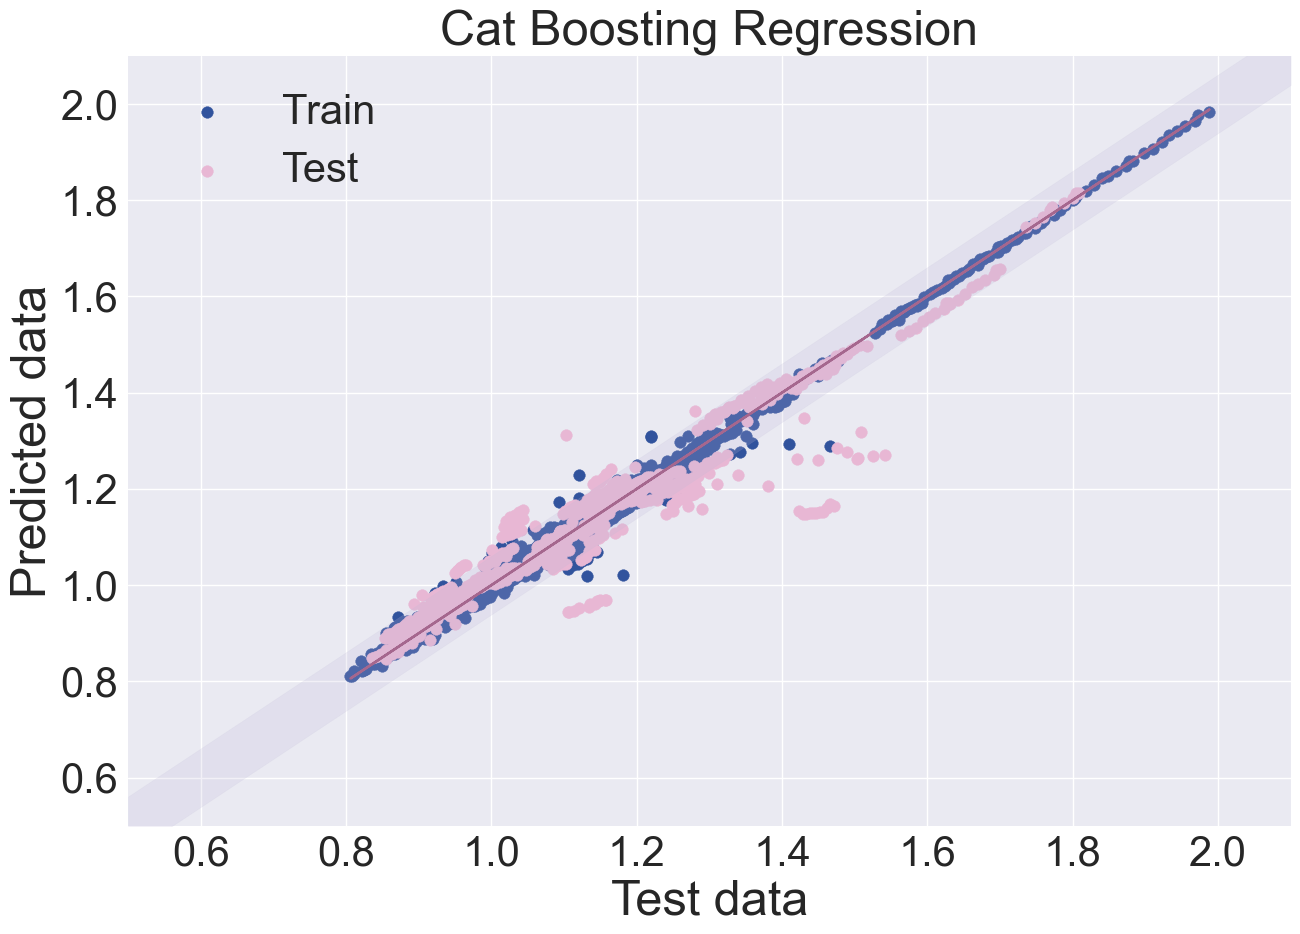

In [50]:
df_error_train3 = pd.DataFrame()
# We split the sample so that there are different systems in the test and training
y = db_final.loc[:,'Density, g/cm^3']
x = db_final.loc[:,'X#1 (molar fraction)':]
cv = custom_cv(x, y, db_final['ind_syst'], 1, 0.2) #Separation using the function
for train_idx, val_idx in cv:
    x_train, x_test = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]
x_train = x_train.copy().drop(['ind_syst'],axis=1)
x_test = x_test.copy().drop(['ind_syst'],axis=1)
sample_w = compute_sample_weight('balanced', y=(x_train[['I','II','III','IV','V']]))
#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#CBR
with open('density_model.pkl', 'rb') as file: 
 pickle_model = pickle.load(file)
regr_CBR = pickle_model
regr_CBR.fit(x_train, y_train, sample_weight=sample_w)
y_pred = regr_CBR.predict(x_test)
y1_pred = regr_CBR.predict(x_train)
#Calculating metrics
df_error_train3['Cat Boosting Regression'] = regr_metrics(regr_CBR, x_train, y_train, y_test, y_pred, y1_pred)
#Plotting a graph
regr_plot(y_train, y_test, y_pred, y1_pred)
plt.title('Cat Boosting Regression', fontsize=35)

In [51]:
df_error_train3

,Cat Boosting Regression
0,0.992267
1,0.901465
2,0.014196
3,0.060797


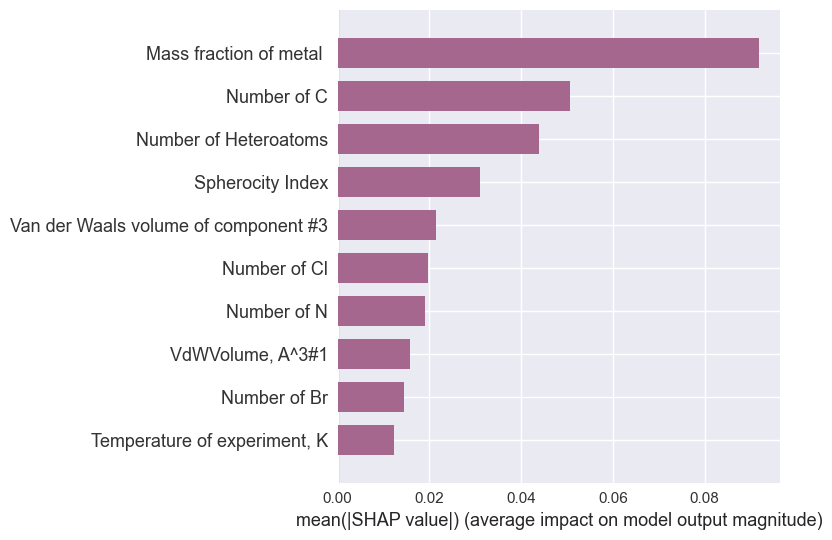

In [52]:
regr_feature(regr_CBR, x_test, list_columns)

In [53]:
#Saving the model
import pickle
filename = 'density_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(regr_CBR, file)
    file.close()